In [11]:
# 超参数
COLS_Y = '0号柴油销量（升）'
COLS_X = '0号柴油价差'
COLS_ALL = ['日期', '0号柴油销量（升）', '0号柴油价差', '石化站价格', '竞争站价格']

SIGN_LINER = 0.7 #判断是否线性相关的显著性
SIGN_PVALUE = 0.05 #判断pValue的显著性

import pandas as pd

# 读取excel文件并获取指定列
df_uncleaned = pd.read_csv('Data/竞争站23年柴油单站32807333.csv', usecols=COLS_ALL)
# 删除包含空值的行
df = df_uncleaned.dropna()
print(df.head())


           日期  0号柴油销量（升）  0号柴油价差  石化站价格  竞争站价格
0  2023-01-01   25905.09     0.0   7.20   7.20
1  2023-01-02   34351.51     0.0   7.20   7.20
2  2023-01-03   43698.26     0.0   7.20   7.20
3  2023-01-04    2445.54     0.2   7.41   7.21
4  2023-01-05   13239.69     0.0   7.41   7.41


Spearman相关系数: -0.016148286142040964
p值: 0.7584823015879614


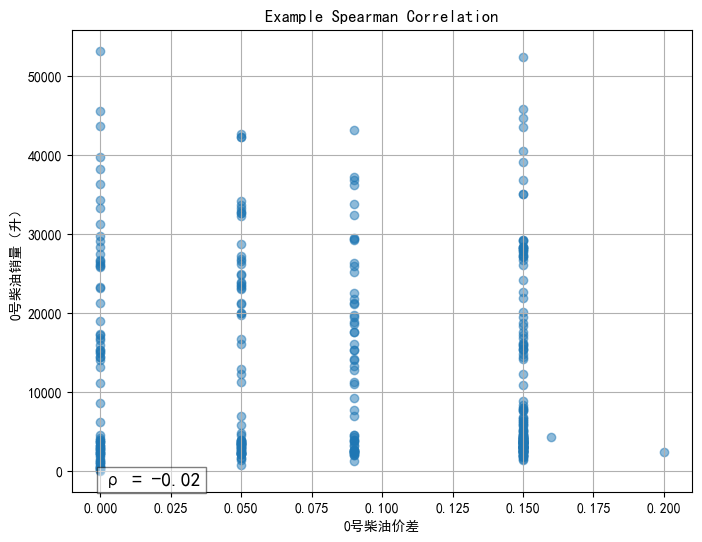

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def spearman_correlation_with_visualization(data1, data2, title='Spearman Correlation'):
    """
    计算两个数据集之间的Spearman等级相关性并进行可视化。
    
    参数:
    data1 : list 或 numpy.ndarray
        第一组数据。
    data2 : list 或 numpy.ndarray
        第二组数据，与data1具有相同数量的数据点。
    title : str
        图表的标题。
    """
    # 计算Spearman等级相关系数和p值
    correlation_coefficient, p_value = stats.spearmanr(data1, data2)
    
    print(f"Spearman相关系数: {correlation_coefficient}")
    print(f"p值: {p_value}")
    
    # 可视化数据点
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
    plt.figure(figsize=(8, 6))
    plt.scatter(data1, data2, alpha=0.5)
    plt.title(title)
    plt.xlabel(COLS_X)
    plt.ylabel(COLS_Y)
    
    # 在散点图上添加相关系数
    if correlation_coefficient >= 0:
        plt.text(0.95, 0.01, f'ρ = {correlation_coefficient:.2f}', transform=plt.gca().transAxes,
                 fontsize=14, verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.5))
    else:
        plt.text(0.05, 0.01, f'ρ = {correlation_coefficient:.2f}', transform=plt.gca().transAxes,
                 fontsize=14, verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.5))
    
    # 显示图表
    plt.grid(True)
    plt.show()

# 使用示例
spearman_correlation_with_visualization(df[COLS_X], df[COLS_Y], title='Example Spearman Correlation')